In [1]:
import sirtipy
import RPproject as rpp
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Assume constant absorption
def alpha_constant(frequency, location, Inu, alpha_val):
    return alpha_val

# Blackbody thermal emission from experiment 2
def j_thermal(frequency, location, Inu, temperature, alphafunc, alphafunc_args):
    B = sirtipy.blackbody_intensity(temperature, frequency)
    alpha = alphafunc(frequency, location, Inu, *alphafunc_args)
    return alpha*B

In [3]:
# Define medium
medium_temp = 2000
alpha_0 = 1e-5

medium = sirtipy.region()
medium.add_emission_func(j_thermal, (medium_temp, alpha_constant, (alpha_0,)))
medium.add_absorption_func(alpha_constant, (alpha_0,))

freqaxis = sirtipy.frequency_axis('log', frange=[1.*u.cm, 1e-6*u.cm])


height = 100*u.pc # Assume galaxy has similar thickness to the milky way disk
s = [0, int(height.to(u.cm).value)]
ds = int(height.to(u.cm).value/500)

In [ ]:
# Due to long computation time, calculate stellar intensity with fewer points and then use interpolation
faxis = np.geomspace(np.min(freqaxis.frequencies), np.max(freqaxis.frequencies), 100)
def I_stellar(faxis):
    tstart = 0.7e9 # How many years before the light was emitted that star formation started
    tstop  = 0.3e9 # How many years before the light was emtited that star formation ended
    return rpp.generate_blackbody(faxis, tstart, tstop, rpp.exp_SFR)
  
coeff = 1e-20
I_initial = I_stellar(faxis)
star_spectrum = [coeff*np.interp(f, faxis, I_initial) for f in freqaxis.frequencies]
def j_stellar(frequency, location, Inu, dummy_arg):
    return np.interp(frequency, faxis, star_spectrum)

medium.add_emission_func(j_stellar,(None,))


In [ ]:
# Create initial spectrum
inspec = sirtipy.spectrum('empty', frequencies=freqaxis)

In [ ]:
spec, tau, locations = sirtipy.radiative_transfer(medium, inspec, s, ds, printevery=50)

In [ ]:
spec[1].plot()
plt.yscale('log')
plt.xscale('log')

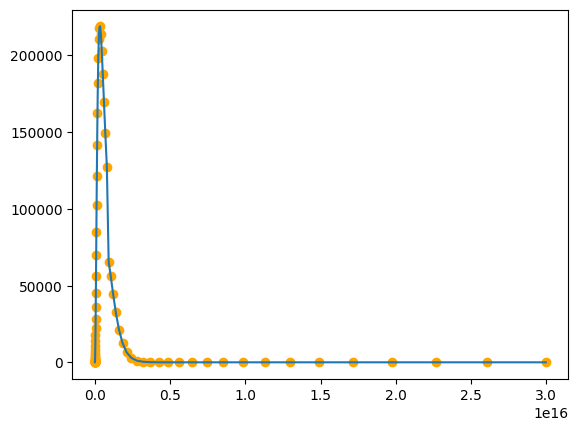

In [24]:
plt.plot(freqaxis.frequencies, Inu)
plt.scatter(faxis, Inu_initial, c='orange')